In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [2]:
df = pd.read_csv("C:/Users/admin/OneDrive/Pictures/OneDrive/Desktop/insurance.xlsx")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.describe() 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


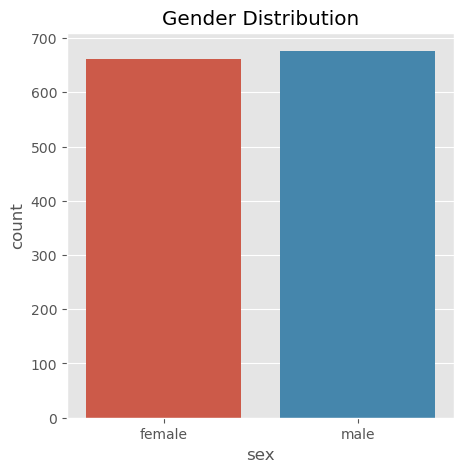

In [10]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

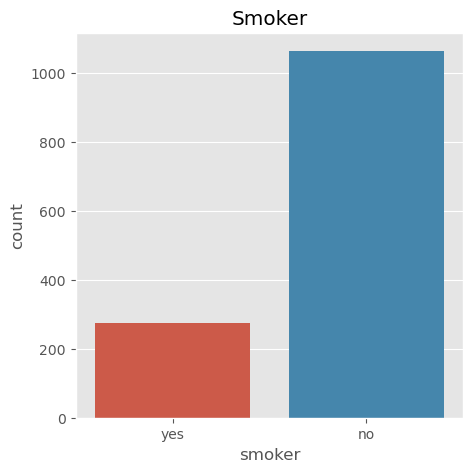

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=df)
plt.title('Smoker')
plt.show()

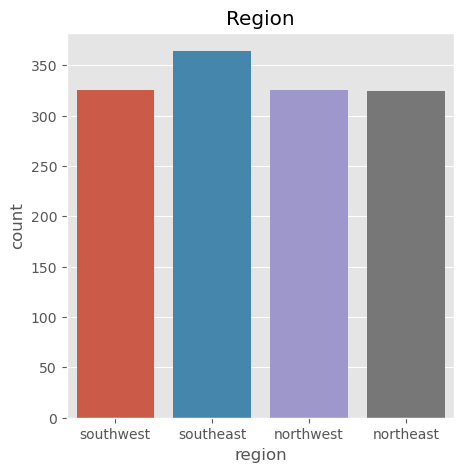

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=df)
plt.title('Region')
plt.show()

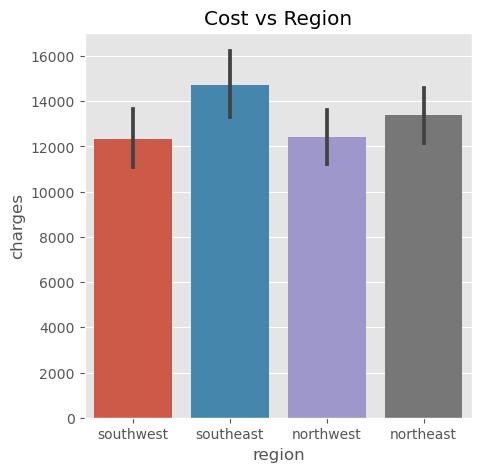

In [13]:
plt.figure(figsize=(5,5))
sns.barplot(x='region', y='charges',data=df)
plt.title('Cost vs Region')
plt.show()

Text(0.5, 1.0, 'Charges For Smokers')

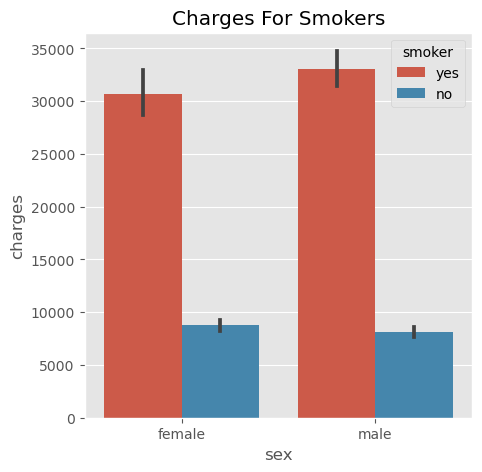

In [14]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex',y='charges',hue='smoker',data=df)
plt.title('Charges For Smokers')

<AxesSubplot:xlabel='region', ylabel='charges'>

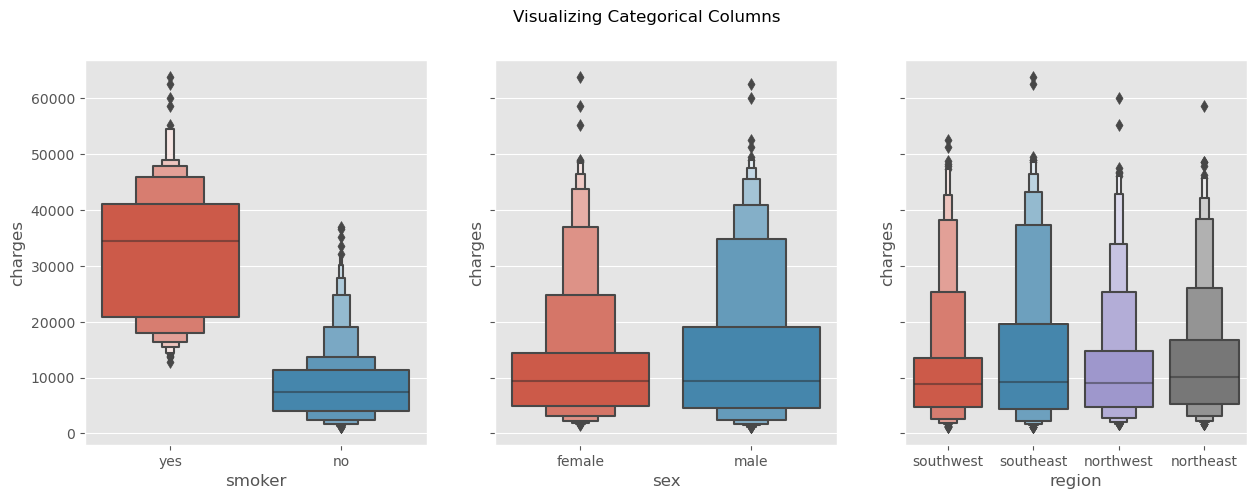

In [15]:
fig, axes = plt.subplots(1,3,figsize=(15,5),sharey=True)
fig.suptitle('Visualizing Categorical Columns')
sns.boxenplot(x='smoker',y='charges',data=df, ax=axes[0])
sns.boxenplot(x='sex',y='charges',data=df, ax=axes[1])
sns.boxenplot(x='region',y='charges',data=df, ax=axes[2])

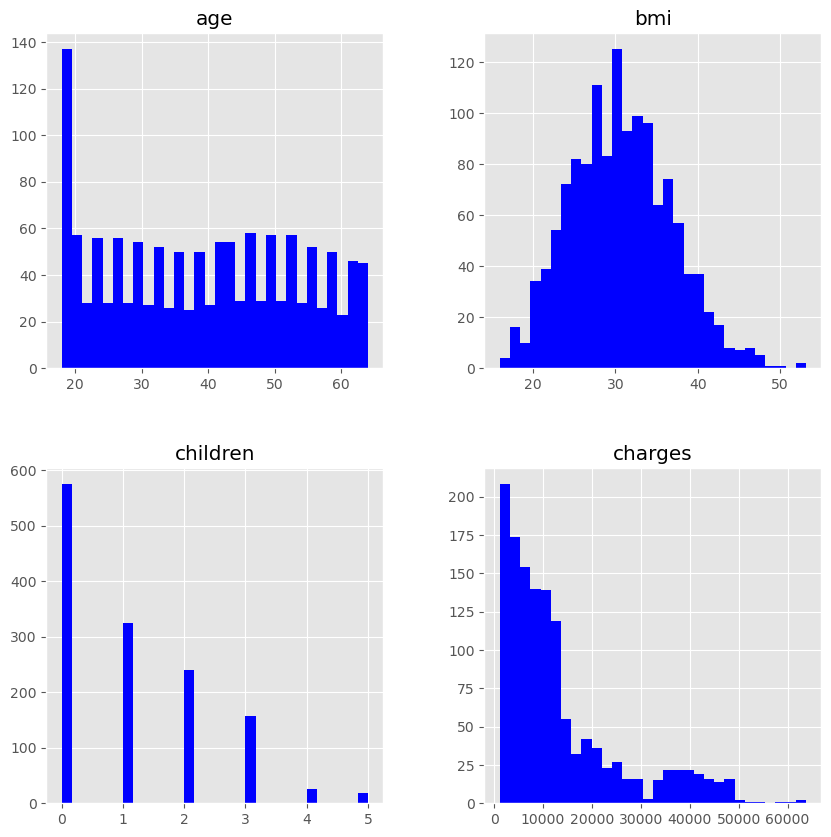

In [16]:
df[['age','bmi','children','charges']].hist(bins=30,figsize=(10,10),color='blue')
plt.show()

#### categorical to numerical value

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
df['sex'] = df['sex'].apply({'male':0, 'female':1}.get)
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


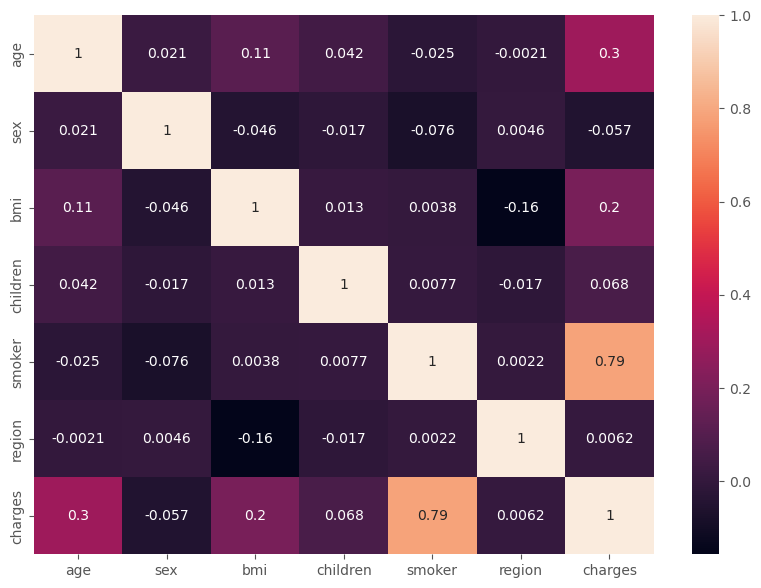

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [21]:
x = df.drop(['charges','sex'], axis=1)
y = df.charges


In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (936, 5)
x_test shape: (402, 5)
y_train shape: (936,)
y_test shape: (402,)


In [23]:
LinReg = LinearRegression()

In [24]:
LinReg.fit(x_train,y_train)
pred = LinReg.predict(x_test)

In [25]:
from sklearn.metrics import r2_score

In [26]:
print("R2 score:", (r2_score(y_test,pred)))

R2 score: 0.7697211527941855


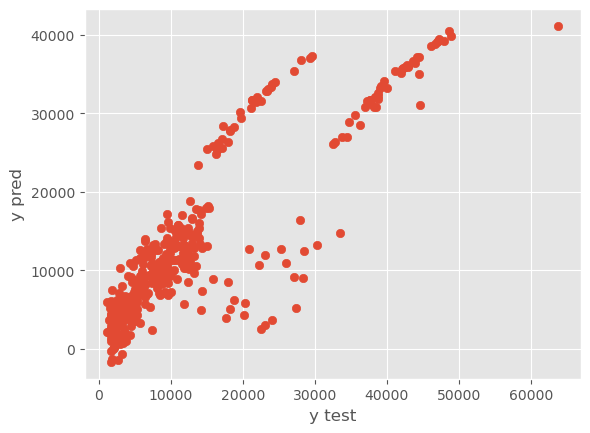

In [27]:
plt.scatter(y_test,pred)
plt.xlabel('y test')
plt.ylabel('y pred')
plt.show()

In [28]:
data = {'age':50, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
cnvrt_df = pd.DataFrame(data, index)
cnvrt_df

,age,bmi,children,smoker,region
0,50,25,2,1,2


In [29]:
cost_pred = LinReg.predict(cnvrt_df)
print("The Medical Insurance Cost Of The New Costumer Is: ", cost_pred)

The Medical Insurance Cost Of The New Costumer Is:  [33206.92756082]


## COMPLETE